In [258]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
merge_table = pd.merge (mouse_drug_data, clinical_trial_data, on="Mouse ID", how = "outer")

# Display the data table for preview
merge_table.head()





,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [259]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
by_drug = merge_table[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
by_drug_df = by_drug.groupby(["Drug", "Timepoint"])
by_drug_df.mean()

# Convert to DataFrame
by_drug_pd_df = pd.DataFrame(by_drug_df.mean().reset_index())

# Preview DataFrame
by_drug_pd_df.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [260]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
by_drug_sem_df = pd.DataFrame(by_drug_df.sem().reset_index())
tumor_sem_df = by_drug_sem_df.rename(columns={"Tumor Volume (mm3)" : "SEM/Tumor Volume"})

# Preview DataFrame
tumor_sem_df.head(20)


,Drug,Timepoint,SEM/Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [261]:
# Minor Data Munging to Re-Format the Volume Data Frames
by_timepoint_pivot = by_drug_pd_df.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
by_timepoint_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [262]:
## Minor Data Munging to Re-Format the SEM Data Frames
by_timepoint_sem_pivot = tumor_sem_df.pivot(index = "Timepoint", columns = "Drug", values = "SEM/Tumor Volume")
by_timepoint_sem_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [263]:
#Obtain data for each drug for plotting y axis
capo_vol = by_timepoint_pivot["Capomulin"]
infu_vol = by_timepoint_pivot["Infubinol"]
keta_vol = by_timepoint_pivot["Ketapril"]
plac_vol = by_timepoint_pivot["Placebo"]
rami_vol = by_timepoint_pivot["Ramicane"]
capo_sem_vol = by_timepoint_sem_pivot["Capomulin"]
infu_sem_vol = by_timepoint_sem_pivot["Infubinol"]
keta_sem_vol = by_timepoint_sem_pivot["Ketapril"]
plac_sem_vol = by_timepoint_sem_pivot["Placebo"]
rami_sem_vol = by_timepoint_sem_pivot["Ramicane"]


In [264]:
#Get keys for x axis
timepoint = list(by_timepoint_pivot.index.values) 


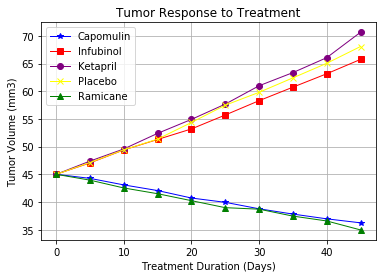

In [265]:
# Generate the Plot (with Error Bars)
capo_plt, = plt.plot(timepoint, capo_vol, marker="*",color="blue", linewidth=1, label="Capomulin")
infu_plt, = plt.plot(timepoint, infu_vol, marker="s", color="red", linewidth=1, label="Infubinol")
keta_plt, = plt.plot(timepoint, keta_vol, marker="o", color = "purple", linewidth=1, label="Ketapril")
plac_plt, = plt.plot(timepoint, plac_vol, marker="x", color = "yellow", linewidth=1, label="Placebo") 
rami_plt, = plt.plot(timepoint, rami_vol, marker="^", color = "green", linewidth=1, label = "Ramicane")

#Set aesthetics, title and axis labels
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Tumor Response to Treatment")
plt.grid(True)

#Plot legend
plt.legend(loc="best")

# Save the Figure
plt.savefig('Tumor_Response_to_Treatment.png') 


## Metastatic Response to Treatment

In [266]:
#Create a new Data Frame for the Metastatic Response columns
meta_sites=merge_table[["Drug", "Timepoint", "Metastatic Sites"]]
meta_sites



,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0
2,Stelasyn,10,0
3,Stelasyn,15,1
4,Stelasyn,20,2
...,...,...,...
1901,Placebo,0,0
1902,Placebo,5,0
1903,Placebo,10,1
1904,Placebo,15,1


In [267]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_sites_bydrug = meta_sites.groupby(["Drug", "Timepoint"])
meta_sites_bydrug.mean()


# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_sites_bydrug.mean().reset_index())

# Preview DataFrame
meta_mean_df


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [268]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sites_sem = meta_sites.groupby(['Drug', 'Timepoint']).sem()


# Convert to DataFrame
meta_sites_sem_df = pd.DataFrame(meta_sites_sem.reset_index())

# Preview DataFrame
meta_sites_sem_df.head(15)
ms_sites_df = meta_sites_sem_df.rename(columns={"Metastatic Sites": "Meta Sites SEM"})
ms_sites_df


,Drug,Timepoint,Meta Sites SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [269]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_org_df = meta_mean_df.pivot(index="Timepoint", columns = "Drug", values = "Metastatic Sites")
meta_mean_org_df.head(10)
meta_org_df = meta_mean_org_df[["Capomulin", "Infubinol", "Ketapril", "Placebo", "Ramicane"]]

# Preview that Reformatting worked
meta_org_df


Drug,Capomulin,Infubinol,Ketapril,Placebo,Ramicane
Timepoint,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000,0.120000
10,0.320000,0.666667,0.590909,0.833333,0.250000
15,0.375000,0.904762,0.842105,1.250000,0.333333
20,0.652174,1.050000,1.210526,1.526316,0.347826
25,0.818182,1.277778,1.631579,1.941176,0.652174
30,1.090909,1.588235,2.055556,2.266667,0.782609
35,1.181818,1.666667,2.294118,2.642857,0.952381
40,1.380952,2.100000,2.733333,3.166667,1.100000


In [270]:
# Minor Data Munging to Re-Format the Data Frames
meta_sites_sem__org_df = ms_sites_df.pivot(index="Timepoint", columns = "Drug", values = "Meta Sites SEM")

# Preview that Reformatting worked
meta_sites_sem__org_df.head(15)
meta_sites_df = meta_sites_sem__org_df[["Capomulin", "Infubinol", "Ketapril", "Placebo", "Ramicane"]]
meta_sites_df


Drug,Capomulin,Infubinol,Ketapril,Placebo,Ramicane
Timepoint,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947,0.066332
10,0.125433,0.159364,0.142018,0.115261,0.090289
15,0.132048,0.194015,0.191381,0.190221,0.115261
20,0.161621,0.234801,0.236680,0.234064,0.119430
25,0.181818,0.265753,0.288275,0.263888,0.119430
30,0.172944,0.227823,0.347467,0.300264,0.139968
35,0.169496,0.224733,0.361418,0.341412,0.145997
40,0.175610,0.314466,0.315725,0.297294,0.160591


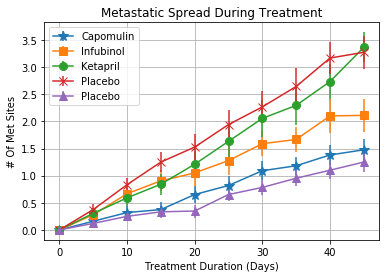

In [271]:
# Generate the Plot (with Error Bars)

#Set the x-axis
timepoint = list(meta_org_df.index.values)

#Obtain data for each drug for plotting y axis
capo_metam = meta_org_df["Capomulin"]
infu_metam = meta_org_df["Infubinol"]
keta_metam = meta_org_df["Ketapril"]
plac_metam = meta_org_df["Placebo"]
rami_metam = meta_org_df["Ramicane"]
capo_metas = meta_sites_df["Capomulin"]
infu_metas = meta_sites_df["Infubinol"]
keta_metas = meta_sites_df["Ketapril"]
plac_metas = meta_sites_df["Placebo"]
rami_metas = meta_sites_df["Ramicane"]

#Set limits, create labels and grid
plt.grid(True)
plt.ylabel("# Of Met Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")

#Plot drugs
plt.errorbar(timepoint, capo_metam, capo_metas, marker = "*", ms = 10, label = "Capomulin")
plt.errorbar(timepoint, infu_metam, infu_metas, marker = "s", ms = 8, label = "Infubinol")
plt.errorbar(timepoint, keta_metam, keta_metas, marker = "o", ms = 8, label = "Ketapril")
plt.errorbar(timepoint, plac_metam, plac_metas, marker = "x", ms = 8, label = "Placebo")
plt.errorbar(timepoint, rami_metam, rami_metas, marker = "^", ms = 8, label = "Placebo")

#Add a legend
plt.legend(loc="best")

# Save the Figure
plt.savefig('Metastatic_Site_Spread.png') 


# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [272]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = merge_table [["Mouse ID", "Drug", "Timepoint"]] 
survival_df = survival.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
survival_stats = pd.DataFrame(survival_df.count().reset_index())
survival_stats_df = survival_stats.rename(columns={"Mouse ID": "Living Mice"})

# Preview DataFrame
survival_stats_df


,Drug,Timepoint,Living Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [273]:
#Determine the survival rate as a percentage of living mice
survival_stats_df["% Survived"] = survival_stats_df["Living Mice"] / 25 * 100 
survival_stats_df


,Drug,Timepoint,Living Mice,% Survived
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0
...,...,...,...,...
95,Zoniferol,25,16,64.0
96,Zoniferol,30,15,60.0
97,Zoniferol,35,14,56.0
98,Zoniferol,40,14,56.0


In [274]:
# Minor Data Munging to Re-Format the Data Frames

perc_survived_df = survival_stats_df.pivot(index="Timepoint", columns = "Drug", values = "% Survived")
perc_survived_df = perc_survived_df[["Capomulin", "Infubinol", "Ketapril", "Placebo", "Ramicane"]]
num_survived_df = survival_stats_df.pivot(index="Timepoint", columns = "Drug", values = "Living Mice")
num_survived_df = num_survived_df[["Capomulin", "Infubinol", "Ketapril", "Placebo", "Ramicane"]]


# Preview the Data Frame
perc_survived_df


Drug,Capomulin,Infubinol,Ketapril,Placebo,Ramicane
Timepoint,,,,,
0,100.0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0,100.0
10,100.0,84.0,88.0,96.0,96.0
15,96.0,84.0,76.0,80.0,96.0
20,92.0,80.0,76.0,76.0,92.0
25,88.0,72.0,76.0,68.0,92.0
30,88.0,68.0,72.0,60.0,92.0
35,88.0,48.0,68.0,56.0,84.0
40,84.0,40.0,60.0,48.0,80.0


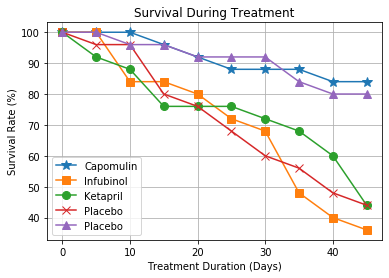

In [275]:
# Generate the Plot (Accounting for percentages)

#Set the x-axis
timepoint = list(perc_survived_df.index.values)

#Grab data for each drug for plotting y axis
capo_perc = perc_survived_df["Capomulin"]
infu_perc = perc_survived_df["Infubinol"]
keta_perc = perc_survived_df["Ketapril"]
plac_perc = perc_survived_df["Placebo"]
rami_perc = perc_survived_df["Ramicane"]


#Set limits, create labels and grid
plt.grid(True)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Survival During Treatment")

#Plot drugs
plt.plot(timepoint, capo_perc, marker = "*", ms = 10, label = "Capomulin")
plt.plot(timepoint, infu_perc, marker = "s", ms = 8, label = "Infubinol")
plt.plot(timepoint, keta_perc, marker = "o", ms = 8, label = "Ketapril")
plt.plot(timepoint, plac_perc, marker = "x", ms = 8, label = "Placebo")
plt.plot(timepoint, rami_perc, marker = "^", ms = 8, label = "Placebo")


#Add a legend, save the plot as a png file and then show the plot
plt.legend(loc="best")

# Save the Figure
plt.savefig('Survival_Rate.png') 

# Show the Figure
plt.show()

## Summary Bar Graph

In [276]:
#Determine the amount and percent growth from beginning to end
by_timepoint_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [277]:
capo_growth = round((by_timepoint_pivot.iloc[9,0] - by_timepoint_pivot.iloc[0,0]) *100 /  by_timepoint_pivot.iloc[0,0], 2)
infu_growth = round((by_timepoint_pivot.iloc[9,2] - by_timepoint_pivot.iloc[0,2]) *100 /  by_timepoint_pivot.iloc[0,2], 2)
keta_growth = round((by_timepoint_pivot.iloc[9,3] - by_timepoint_pivot.iloc[0,3]) *100 /  by_timepoint_pivot.iloc[0,3], 2)
plac_growth = round((by_timepoint_pivot.iloc[9,5] - by_timepoint_pivot.iloc[0,5]) *100 /  by_timepoint_pivot.iloc[0,5], 2)
rami_growth = round((by_timepoint_pivot.iloc[9,7] - by_timepoint_pivot.iloc[0,7]) *100 /  by_timepoint_pivot.iloc[0,7], 2)
tumor_changes = [capo_growth, infu_growth, keta_growth, plac_growth, rami_growth]
tumor_changes


[-19.48, 46.12, 57.03, 51.3, -22.32]

In [278]:
#Set horizontal axis for bar chart using drugs as x axis
horizontal_axis = ["Capomulin", "Infubinol", "Ketapril", "Placebo", "Ramicane"]
x_axis = np.arange(len(horizontal_axis))



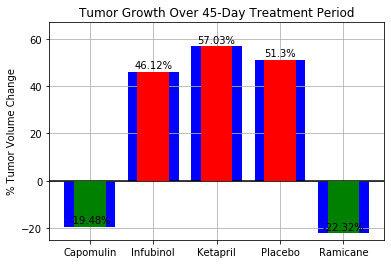

In [279]:
# Create a bar chart based upon the above data
fig, ax = plt.subplots() 
zero=0
above_zero = np.maximum(tumor_changes, zero)
below_zero = np.minimum(tumor_changes, zero)
ax.bar(x_axis, below_zero, 0.5, color="g", zorder=3)
ax.bar(x_axis, above_zero, 0.5, color="r", zorder=3)
    
plt.bar(x_axis, tumor_changes, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, horizontal_axis)

      
#create title and labels
ax.set_title("Tumor Growth Over 45-Day Treatment Period")
ax.set_ylabel("% Tumor Volume Change")

#Label the value of each bar
labels = [str(capo_growth) + "%", str(infu_growth) + "%", str(keta_growth) + "%", 
                  str(plac_growth) + "%", str(rami_growth) + "%"]

# Set the limits of the y axis
plt.ylim(-25, max(tumor_changes)+ 10)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')

#create a horizontal line to designate "0"
ax.axhline(0, color='black')

#add grid
ax.grid(zorder=0)

# Save the Figure
plt.savefig('Tumor_Growth_bar_chart.png') 

# Show the Figure
plt.show()